In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
plt.style.use('seaborn-white')

<ipython-input-1-6d0fa4db7acd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
import morl
from env_LQG import LQG

use_B = False

In [3]:
def main(n_obj: int, c_dim: int, n_rep: int, name: str = None):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=n_obj, 
                                      hidden_dim=24, 
                                      act_space=('continuous', n_obj), 
                                      c_dim=c_dim, 
                                      seed=i,
                                      embed_dims=None, 
                                      std=0.2).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=500, 
                         n_grad_repeat=1, 
                         group_size_train=200, 
                         group_size_test=200, 
                         env=LQG(n_obj=n_obj, noise_std=0, a_max=11, normalizer=lambda x: x / 5.0 - 1.0), 
                         n_obj=n_obj, 
                         test_repeat=1, 
                         n_jobs=15, 
                         ep_len_train=30, 
                         ep_len_test=30, 
                         nn_k=3, 
                         beta=10.0, 
                         J_AU=np.asarray([-310.0] * n_obj), 
                         J_U=np.asarray([-150.0] * n_obj), 
                         gamma_train=0.9, 
                         gamma_test=0.9, 
                         mode='median', 
                         score_clipped_above_zero=True,
                         use_QV=False, 
                         QV_params=None
                        )
        if name is None:
            with open('out_{}.pkl'.format(i), 'wb') as f:
                pickle.dump(out, f)
        else:
            with open('out_{}_{}.pkl'.format(name, i), 'wb') as f:
                pickle.dump(out, f)

# c_dim $\in\{1, 2, 3\}$

In [ ]:
%%time
main(n_obj=2, n_rep=5, c_dim=1, name='cdim=1')

In [ ]:
%%time
main(n_obj=2, n_rep=5, c_dim=2, name='cdim=2')

In [ ]:
%%time
main(n_obj=2, n_rep=5, c_dim=3, name='cdim=3')

In [3]:
out_cdim_1 = []
for i in range(1, 6):
    with open('out_cdim=1_{}.pkl'.format(i), 'rb') as f:
        out_cdim_1 += [pickle.load(f)]
        
out_cdim_2 = []
for i in range(1, 6):
    with open('out_cdim=2_{}.pkl'.format(i), 'rb') as f:
        out_cdim_2 += [pickle.load(f)]
        
out_cdim_3 = []
for i in range(1, 6):
    with open('out_cdim=3_{}.pkl'.format(i), 'rb') as f:
        out_cdim_3 += [pickle.load(f)]

In [68]:
[np.max(out_cdim_1[i][0]) for i in range(5)], \
[np.max(out_cdim_2[i][0]) for i in range(5)], \
[np.max(out_cdim_3[i][0]) for i in range(5)]

([1.1400668314833464,
  1.1245493336031651,
  1.1302218077159738,
  1.1328324044293916,
  1.1243958119204538],
 [1.1392752174336565,
  1.1277358287541004,
  1.128028806421463,
  1.1309309363628728,
  1.138807862821551],
 [1.1338239796706866,
  1.1136766600579624,
  1.130614106915944,
  1.1294234386307567,
  1.133505843704357])

In [69]:
(1, np.mean([np.max(out_cdim_1[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_1[i][0]) for i in range(5)])), \
(2, np.mean([np.max(out_cdim_2[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_2[i][0]) for i in range(5)])), \
(3, np.mean([np.max(out_cdim_3[i][0]) for i in range(5)]), 
 np.std([np.max(out_cdim_3[i][0]) for i in range(5)]))

((1, 1.130413237830466, 0.005825387031030098),
 (2, 1.1329557303587285, 0.00509519605557735),
 (3, 1.1282088057959414, 0.0074569813516995225))

In [4]:
_o1 = np.asarray([out_cdim_1[i][0] for i in range(5)])
_o2 = np.asarray([out_cdim_2[i][0] for i in range(5)])
_o3 = np.asarray([out_cdim_3[i][0] for i in range(5)])

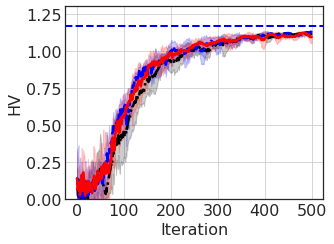

In [71]:
plt.figure(figsize=(4.6, 3.5))
plt.xticks(np.arange(0, 501, 100))
plt.ylim(0, 1.3)
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.axhline(1.1645847425838294, ls='--', c='b', lw=2)

plt.plot(_o1.mean(axis=0), c='k', lw=2.5, ls='-.')
plt.fill_between(np.arange(501), 
                 _o1.mean(axis=0) - _o1.std(axis=0), 
                 _o1.mean(axis=0) + _o1.std(axis=0), alpha=0.2, color='k')

plt.plot(_o2.mean(axis=0), c='b', lw=2.5, ls='--')
plt.fill_between(np.arange(501), 
                 _o2.mean(axis=0) - _o2.std(axis=0), 
                 _o2.mean(axis=0) + _o2.std(axis=0), alpha=0.2, color='b')

plt.plot(_o3.mean(axis=0), c='r', lw=2.5)
plt.fill_between(np.arange(501), 
                 _o3.mean(axis=0) - _o3.std(axis=0), 
                 _o3.mean(axis=0) + _o3.std(axis=0), alpha=0.2, color='r')

plt.tight_layout()
# plt.savefig('learning_fruit_{}.png'.format(d_FTN), dpi=400)

In [4]:
# best policies
_oo1 = [out_cdim_1[i][2] for i in range(5)]
_oo2 = [out_cdim_2[i][2] for i in range(5)]
_oo3 = [out_cdim_3[i][2] for i in range(5)]

In [6]:
%%time
TEST_SIZE = 1500
for n, X in enumerate([_oo1, _oo2, _oo3]):
    peak_hv = []
    for i in range(5):
        cs, all_R = morl.group_evaluation_REPEAT(policy=X[i], 
                                                 group_size=TEST_SIZE, 
                                                 n_jobs=15, 
                                                 env=LQG(n_obj=2, noise_std=0, a_max=11, 
                                                         normalizer=lambda x: x / 5.0 - 1.0)\
                                                 .set_ep_len(30), 
                                                 seed=1, deterministic=True, n_obj=2, gamma=0.9, 
                                                 n_episode_repeat=1)
        
        peak_hv += [morl.HV(Rs=np.asarray(all_R), 
                            ref_point=np.asarray([-310.0] * 2)) / 160**2]
    
    print(n + 1, np.mean(peak_hv), np.std(peak_hv))

1 1.140823111512012 0.006096010066700723
2 1.145680312701114 0.003996567796015528
3 1.1408460730472734 0.007568110758608203
CPU times: user 14.5 s, sys: 731 ms, total: 15.2 s
Wall time: 44.6 s


# Comparison with true PF

In [7]:
%%time
from optimal_lqg_solver import MO_LQG_return

ws = np.arange(0.01, 1, 0.01)
ws = np.hstack([ws.reshape(-1, 1), 1 - ws.reshape(-1, 1)])

opt_Rs = np.asarray([MO_LQG_return(xi=0.1, gamma=0.9, w=w, x_init=[10.0]*2, 
                                   n_repeat=1, T_horizon=30, noise_std=0)
         for w in ws])

CPU times: user 3.62 s, sys: 2.75 s, total: 6.37 s
Wall time: 3.17 s


In [8]:
opt_Rs

array([[-265.62565799, -130.64527566],
       [-259.80372126, -130.73353445],
       [-254.46643393, -130.8700444 ],
       [-249.54368294, -131.04829164],
       [-244.97913189, -131.26311408],
       [-240.72690085, -131.51036783],
       [-236.74917671, -131.78668899],
       [-233.01446053, -132.08932017],
       [-229.49626035, -132.41598212],
       [-226.17210129, -132.76477726],
       [-223.02276584, -133.13411617],
       [-220.03170341, -133.52266089],
       [-217.1845663 , -133.92928067],
       [-214.46884119, -134.35301717],
       [-211.87355381, -134.7930567 ],
       [-209.38903002, -135.24870802],
       [-207.0067011 , -135.71938433],
       [-204.71894377, -136.20458869],
       [-202.51894791, -136.703902  ],
       [-200.40060638, -137.21697313],
       [-198.35842277, -137.74351079],
       [-196.38743366, -138.28327666],
       [-194.48314279, -138.83607978],
       [-192.64146503, -139.40177179],
       [-190.85867842, -139.98024295],
       [-189.13138301, -1

In [22]:
# optimal HV
morl.HV((opt_Rs - np.asarray([-310.0] * 2)) / (np.asarray([-150.0] * 2) - np.asarray([-310.0] * 2)), 
        ref_point=np.zeros(2))

1.1645847425838294

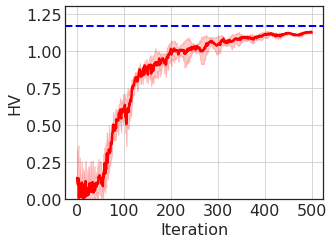

In [72]:
plt.figure(figsize=(4.6, 3.5))
plt.xticks(np.arange(0, 501, 100))
plt.ylim(0, 1.3)
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)
plt.plot(_o2.mean(axis=0), c='r', lw=2.5)
plt.fill_between(np.arange(501), 
                 _o2.mean(axis=0) - _o2.std(axis=0), 
                 _o2.mean(axis=0) + _o2.std(axis=0), alpha=0.2, color='r')
plt.axhline(1.1645847425838294, ls='--', c='b', lw=2)
plt.tight_layout()
# plt.savefig('learning_fruit_{}.png'.format(d_FTN), dpi=400)

# Q と V を使用

In [4]:
def main_QV(n_obj: int, c_dim: int, n_rep: int, name: str = None):
    for i in range(1, 1 + n_rep):
        
        np.random.seed(i)
        
        policy = morl.make_policy_net(state_dim=n_obj, 
                                      hidden_dim=24, 
                                      act_space=('continuous', n_obj), 
                                      c_dim=c_dim, 
                                      seed=i,
                                      embed_dims=None, 
                                      std=0.2).to(morl.DEVICE)
        
        out = morl.learn(policy=policy, 
                         gradient_steps=500, 
                         n_grad_repeat=1, 
                         group_size_train=200, 
                         group_size_test=200, 
                         env=LQG(n_obj=n_obj, noise_std=0, a_max=11, normalizer=lambda x: x / 5.0 - 1.0), 
                         n_obj=n_obj, 
                         test_repeat=1, 
                         n_jobs=15, 
                         ep_len_train=30, 
                         ep_len_test=30, 
                         nn_k=3, 
                         beta=10.0, 
                         J_AU=np.asarray([-310.0] * n_obj), 
                         J_U=np.asarray([-150.0] * n_obj), 
                         gamma_train=0.9, 
                         gamma_test=0.9, 
                         mode='median', 
                         score_clipped_above_zero=False,    # no clipping
                         use_QV=True, 
                         QV_params={
                             'n_epochs': 1, 
                             'hidden_size': 24,
                             'batch_size': 64
                         }
                        )
        if name is None:
            with open('out_QV_{}.pkl'.format(i), 'wb') as f:
                pickle.dump(out, f)
        else:
            with open('out_QV_{}_{}.pkl'.format(name, i), 'wb') as f:
                pickle.dump(out, f)

In [5]:
%%time
main_QV(n_obj=2, n_rep=5, c_dim=2, name='cdim=2')

0 [0.1639] 1 [0.4166] 2 [0.3182] 3 [0.503] 4 [0.0] 5 [0.6065] 6 [0.4546] 7 [0.5222] 8 [0.2226] 9 [0.5919] 10 [0.6524] 11 [0.6327] 12 [0.5863] 13 [0.4391] 14 [0.2769] 15 [0.487] 16 [0.5978] 17 [0.1326] 18 [0.4798] 19 [0.3689] 20 [0.4471] 21 [0.4644] 22 [0.3757] 23 [0.1805] 24 [0.2861] 25 [0.1491] 26 [0.2145] 27 [0.1137] 28 [0.224] 29 [0.1799] 30 [0.0] 31 [0.003247] 32 [0.09304] 33 [0.0] 34 [0.009004] 35 [0.0] 36 [0.0] 37 [0.0] 38 [0.0] 39 [0.0] 40 [0.0] 41 [0.06689] 42 [0.146] 43 [0.06104] 44 [0.2869] 45 [0.2396] 46 [0.1748] 47 [0.2365] 48 [0.3198] 49 [0.4593] 50 [0.484] 51 [0.3925] 52 [0.5319] 53 [0.5147] 54 [0.4284] 55 [0.6276] 56 [0.5456] 57 [0.6625] 58 [0.618] 59 [0.633] 60 [0.6473] 61 [0.7055] 62 [0.651] 63 [0.7065] 64 [0.7769] 65 [0.7135] 66 [0.7635] 67 [0.7425] 68 [0.7539] 69 [0.7423] 70 [0.7741] 71 [0.7513] 72 [0.7555] 73 [0.7824] 74 [0.8044] 75 [0.803] 76 [0.6377] 77 [0.71] 78 [0.753] 79 [0.7416] 80 [0.8047] 81 [0.8073] 82 [0.8484] 83 [0.8587] 84 [0.9078] 85 [0.944] 86 [0.8903]

In [7]:
out_qv = []
for i in range(1, 6):
    with open('out_QV_cdim=2_{}.pkl'.format(i), 'rb') as f:
        out_qv += [pickle.load(f)]

In [8]:
[np.max(out_qv[i][0]) for i in range(5)]

[1.0785410771456256,
 1.09204722053445,
 1.0731330981706482,
 1.092584938118444,
 1.106427511422957]

In [9]:
(2, np.mean([np.max(out_qv[i][0]) for i in range(5)]), 
 np.std([np.max(out_qv[i][0]) for i in range(5)]))

(2, 1.088546769078425, 0.011713035800257976)

In [6]:
_oqv = np.asarray([out_qv[i][0] for i in range(5)])

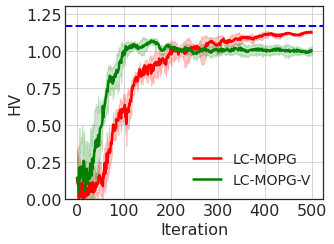

In [8]:
plt.figure(figsize=(4.6, 3.5))
plt.xticks(np.arange(0, 501, 100))
plt.ylim(0, 1.3)
plt.tick_params(labelsize=16)
plt.grid()
plt.ylabel('HV', fontsize=16)
plt.xlabel('Iteration', fontsize=16)

plt.plot(_o2.mean(axis=0), c='r', lw=2.5, label='LC-MOPG')
plt.fill_between(np.arange(501), 
                 _o2.mean(axis=0) - _o2.std(axis=0), 
                 _o2.mean(axis=0) + _o2.std(axis=0), alpha=0.2, color='r')

plt.plot(_oqv.mean(axis=0), c='g', lw=2.5, label='LC-MOPG-V')
plt.fill_between(np.arange(501), 
                 _oqv.mean(axis=0) - _oqv.std(axis=0), 
                 _oqv.mean(axis=0) + _oqv.std(axis=0), alpha=0.2, color='g')

plt.axhline(1.1645847425838294, ls='--', c='b', lw=2)
plt.legend(fontsize=14)
plt.tight_layout()
# plt.savefig('learning_lqg_2d.png', dpi=400)

In [8]:
_ooqv = np.asarray([out_qv[i][2] for i in range(5)])

In [9]:
%%time
TEST_SIZE = 1500
peak_hv = []
for i in range(5):
    cs, all_R = morl.group_evaluation_REPEAT(policy=_ooqv[i], 
                                             group_size=TEST_SIZE, 
                                             n_jobs=15, 
                                             env=LQG(n_obj=2, noise_std=0, a_max=11, 
                                                     normalizer=lambda x: x / 5.0 - 1.0)\
                                             .set_ep_len(30), 
                                             seed=1, deterministic=True, n_obj=2, gamma=0.9, 
                                             n_episode_repeat=1)

    peak_hv += [morl.HV(Rs=np.asarray(all_R), 
                        ref_point=np.asarray([-310.0] * 2)) / 160**2]

print(np.mean(peak_hv), np.std(peak_hv))

1.1030783578816645 0.008984757469317322
CPU times: user 4.78 s, sys: 249 ms, total: 5.03 s
Wall time: 14.7 s


# PF with or without QV: comparison

In [26]:
import seaborn as sns

In [3]:
# best policy
with open('out_cdim=2_1.pkl', 'rb') as f:
    pol = pickle.load(f)[2]

# QV best policy
with open('out_QV_cdim=2_1.pkl', 'rb') as f:
        pol_qv = pickle.load(f)[2]

In [14]:
%%time
TEST_SIZE = 1000
_, all_R = morl.group_evaluation_REPEAT(policy=pol, 
                                        group_size=TEST_SIZE, 
                                        n_jobs=15, 
                                        env=LQG(n_obj=2, noise_std=0, a_max=11, 
                                                normalizer=lambda x: x / 5.0 - 1.0)\
                                        .set_ep_len(30), 
                                        seed=1, deterministic=True, n_obj=2, gamma=0.9, 
                                        n_episode_repeat=1)
pf_best = np.array(all_R)

CPU times: user 657 ms, sys: 62.5 ms, total: 719 ms
Wall time: 2.18 s


In [15]:
%%time
TEST_SIZE = 1000
_, all_R = morl.group_evaluation_REPEAT(policy=pol_qv, 
                                        group_size=TEST_SIZE, 
                                        n_jobs=15, 
                                        env=LQG(n_obj=2, noise_std=0, a_max=11, 
                                                normalizer=lambda x: x / 5.0 - 1.0)\
                                        .set_ep_len(30), 
                                        seed=1, deterministic=True, n_obj=2, gamma=0.9, 
                                        n_episode_repeat=1)
pf_best_qv = np.array(all_R)

CPU times: user 748 ms, sys: 28.1 ms, total: 776 ms
Wall time: 1.99 s


In [17]:
pf_idx = morl.deviation_from_pf(morl.R_normalize(pf_best, mode='median')) < 1e-5
pf_qv_idx = morl.deviation_from_pf(morl.R_normalize(pf_best_qv, mode='median')) < 1e-5

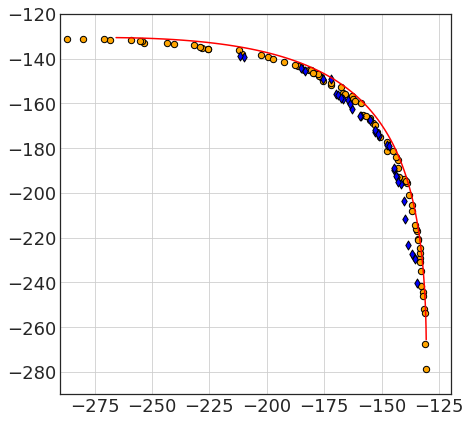

In [27]:
plt.figure(figsize=(7, 7))
plt.tick_params(labelsize=18)
plt.grid()
plt.xlim(-290, -120)
plt.ylim(-290, -120)
plt.scatter(pf_best[:, 0][pf_idx], pf_best[:, 1][pf_idx], s=40, edgecolor='k', c='orange')
plt.scatter(pf_best_qv[:, 0][pf_qv_idx], pf_best_qv[:, 1][pf_qv_idx], s=40, edgecolor='k', c='blue', marker='d')

plt.plot(opt_Rs[:, 0], opt_Rs[:, 1], c='r')

In [41]:
import pandas as pd

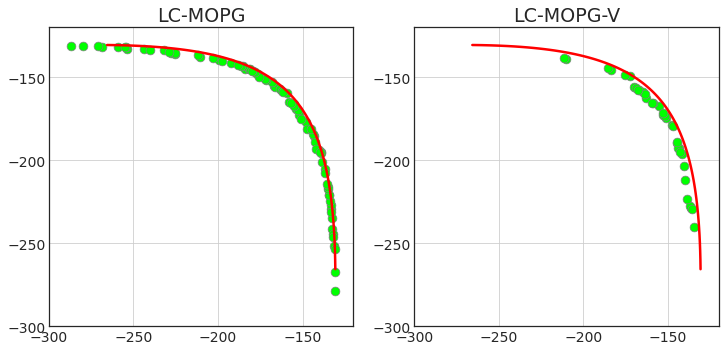

In [119]:
f, axs = plt.subplots(1, 2, figsize=(12, 5.5))
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)
axs[0].grid()
axs[1].grid()
MAX = - 120
axs[0].set_xlim(-300, MAX)
axs[1].set_xlim(-300, MAX)
axs[0].set_ylim(-300, MAX)
axs[1].set_ylim(-300, MAX)
axs[0].set_xticks(np.arange(-300, MAX, 50))
axs[1].set_xticks(np.arange(-300, MAX, 50))
axs[0].set_yticks(np.arange(-300, MAX, 50))
axs[1].set_yticks(np.arange(-300, MAX, 50))

sns.lineplot(data=pd.DataFrame(opt_Rs), x=0, y=1, ax=axs[0], color='r', lw=2.5)
sns.lineplot(data=pd.DataFrame(opt_Rs), x=0, y=1, ax=axs[1], color='r', lw=2.5)

sns.scatterplot(data=pd.DataFrame(pf_best[pf_idx]), x=0, y=1, ax=axs[0], s=77, color='lime', edgecolor='grey')
sns.scatterplot(data=pd.DataFrame(pf_best_qv[pf_qv_idx]), x=0, y=1, ax=axs[1], s=77, color='lime', edgecolor='grey')

axs[0].set(xlabel=None, ylabel=None)
axs[0].set_title('LC-MOPG', fontsize=19)
axs[1].set(xlabel=None, ylabel=None)
axs[1].set_title('LC-MOPG-V', fontsize=19)

# plt.show()
plt.savefig('fg_pf_lqg.png', dpi=400)